In [5]:
import jax
import jax.numpy as jnp
import myjax.nn as nn
from myjax.utils import Dataset, DataLoader
import matplotlib.pyplot as plt


The model is: 
Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True), Total parameters: 256, 
  (1): Relu(), Total parameters: 0, 
  (2): Linear(in_features=128, out_features=128, bias=True), Total parameters: 16512, 
  (3): Relu(), Total parameters: 0, 
  (4): Linear(in_features=128, out_features=1, bias=True), Total parameters: 129, 
)
Total parameters: 16897

Epoch (    0/ 1000) train_loss = 16.606
Epoch (  100/ 1000) train_loss = 0.36558
Epoch (  200/ 1000) train_loss = 0.30517
Epoch (  300/ 1000) train_loss = 0.27303
Epoch (  400/ 1000) train_loss = 0.24705
Epoch (  500/ 1000) train_loss = 0.21498
Epoch (  600/ 1000) train_loss = 0.1867
Epoch (  700/ 1000) train_loss = 0.15968
Epoch (  800/ 1000) train_loss = 0.13829
Epoch (  900/ 1000) train_loss = 0.11634
Epoch ( 1000/ 1000) train_loss = 0.096909


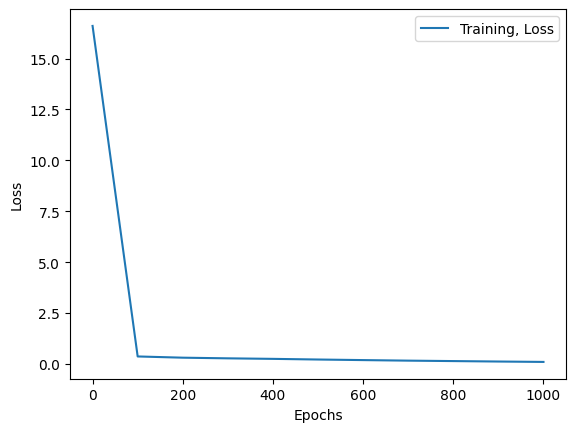

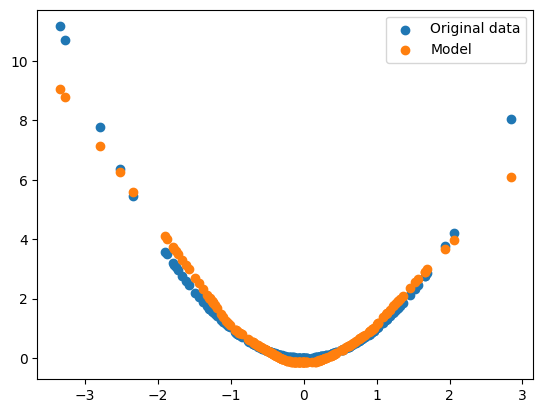

In [6]:
# Random data for testing
seed = 1701
key = jax.random.PRNGKey(seed)
key, x_key, n_key = jax.random.split(key, num=3)

# Quadratic model
xs = jax.random.normal(x_key, shape=(200,1))
ys = xs**2

# Create dataset
dataset = Dataset(xs, ys)

# Create dataloader
data = DataLoader(dataset, key=key, batch_size=40)

# Create model
model = nn.Sequential([nn.Linear(1,128), nn.Relu(), nn.Linear(128,128), nn.Relu(), nn.Linear(128,1)  ])

# Initialize Model
key, l1_key = jax.random.split(key)
key, params = model.init(key)
print ('\nThe model is: ')
print (model)


# Initialize trainer
trainer = nn.Trainer(learning_rate=0.001)
#print ('\nThe initial parameters are: ')
#print (params)

# Fit model
params = trainer.fit(params, model, data, max_epochs = 1000, log_epoch=100)
#print (params)

# Compare final answer
plt.figure()
plt.scatter(xs, ys,label='Original data')
y_hat = jnp.array(model(params, xs))
plt.scatter(xs, y_hat,label='Model')
plt.legend();

